<a href="https://colab.research.google.com/github/mili-b/mili-b/blob/main/Data201PythonProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# "diabetes dataset of 130 US hospitals for the years from 1999-2008" -  Identifying High Risk Patients for Hospital Readmission
# (https://scholar.smu.edu/cgi/viewcontent.cgi?article=1081&context=datasciencereview)
# population is largely caucasian (75%), female (54%), and older (80% over 50 years and 90% over 40 years)
# subgroup examined - those readmitted within 30 days of discharge - exhibited similar characteristics to the population 
# across a number of variables - race, gender, age, admission source, admission type. Descriptive statistics - means, SDs were similar too.
# the subgroup (<30 days) appears to have the biggest differences with the population on the variable - discharge disposition - 
# discharge disposition - where population discharged to - discharge to home (59% population), skilled nursing facility (13.7%),
# and home with home health services (12.7%).  the numbers for the subgroup (readmitted <30 days) showed some differences
# for the readmit group, only 49% (lower than population) had been discharged to home, 18% had been discharged to skilled nursing facility 
# (higher than population) and 14.4% to home with home health services (higher than population). These results are surprising given that 
# least supervised dischaged home) had less readmit.  this could also be due to them being less sick and so sent home without close supervision.
# these finding are consisten the the research study cited in line 1 above - that discharge disposition is one factor in identifying
#  high risk patients for readmission



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

df.shape   # 101,766 rows and 50 colummns


(101766, 50)

In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# DROP COLUMNS - weight (no data); payer code (no data); medical specialty (plenty missing data), range of medications (plenty 'NO')
# NOTE - there are 2273 missing race - will leave as is - since other row cells are populated
# NOTE - there are 3 missing/unknown gender (two overlap with missing race) - will leave - since other row cells are populated
 
drop_cols = ['weight', 'payer_code', 'medical_specialty','diag_1',	'diag_2',	'diag_3', 
             'metformin',	'repaglinide',	'nateglinide',	'chlorpropamide',	'glimepiride',	
             'acetohexamide',	'glipizide',	'glyburide',	'tolbutamide',	'pioglitazone',	
             'rosiglitazone', 'acarbose',	'miglitol',	'troglitazone',	'tolazamide',	'examide',	
             'citoglipton', 'glyburide-metformin',	'glipizide-metformin',	'glimepiride-pioglitazone',	
             'metformin-rosiglitazone',	'metformin-pioglitazone']
df.drop(drop_cols, inplace = True, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [5]:
# encounter_id is unique

df['encounter_id'].is_unique

True

In [6]:
# patient_nbr is not unique - maybe duplicates associated with re-admission. Will not drop duplicate patient numbers - interested in readmission
# example - patient_nbr = 101761 was readmitted and is not unique

df['patient_nbr'].is_unique

False

In [7]:
df.patient_nbr.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
101761     True
101762     True
101763     True
101764     True
101765    False
Name: patient_nbr, Length: 101766, dtype: bool

In [8]:
df.patient_nbr.duplicated().sum()

30248

In [9]:
df.iloc[101761]

encounter_id                      443847548
patient_nbr                       100162476
race                        AfricanAmerican
gender                                 Male
age                                 [70-80)
admission_type_id                         1
discharge_disposition_id                  3
admission_source_id                       7
time_in_hospital                          3
num_lab_procedures                       51
num_procedures                            0
num_medications                          16
number_outpatient                         0
number_emergency                          0
number_inpatient                          0
number_diagnoses                          9
max_glu_serum                          None
A1Cresult                                >8
insulin                                Down
change                                   Ch
diabetesMed                             Yes
readmitted                              >30
Name: 101761, dtype: object

In [10]:
# PROFILE OF SOME (CATEGORICAL) POPULATION VARIABLES

 # READMITTED - POPULATION
# almost half (46%) of the population was readmitted - 11% readmitted within 30 days and 35% readmitted after 30 days

print(pd.unique(df['readmitted']))

['NO' '>30' '<30']


In [11]:
df.groupby(['readmitted'])['encounter_id'].count()

readmitted
<30    11357
>30    35545
NO     54864
Name: encounter_id, dtype: int64

In [12]:
groupby_readmitted = df.groupby(['readmitted'])['encounter_id'].count()
groupby_readmitted/101766

readmitted
<30    0.111599
>30    0.349282
NO     0.539119
Name: encounter_id, dtype: float64

In [13]:
# DISCHARGE DISPOSITION - POPULATION
# Most of the population (over 86%) was discharged to three facilities:
  # 60% to home (code 1), 13.7% to a skilled nursing facility (code 3), and 12.7% to home with home health services (code 6)

print(pd.unique(df['discharge_disposition_id']))

[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


In [14]:
group_by_discharge = df.groupby(['discharge_disposition_id'])['encounter_id'].count().sort_values(ascending=False)
group_by_discharge
group_by_discharge/101766

discharge_disposition_id
1     0.591887
3     0.137118
6     0.126781
18    0.036269
2     0.020911
22    0.019584
11    0.016135
5     0.011635
25    0.009718
4     0.008009
7     0.006122
23    0.004049
13    0.003921
14    0.003655
28    0.001366
8     0.001061
15    0.000619
24    0.000472
9     0.000206
17    0.000138
16    0.000108
19    0.000079
10    0.000059
27    0.000049
12    0.000029
20    0.000020
Name: encounter_id, dtype: float64

In [15]:
# ADMISSION TYPE ID - POPULATION
# almost 90% of admissions came from three sources: Emergency (code 1)=53%; Elective (code 3)=18.5%; Urgent (code 2)=18.2%

print(pd.unique(df['admission_type_id']))

[6 1 2 3 4 5 8 7]


In [16]:
groupby_admission_type = df.groupby(['admission_type_id'])['encounter_id'].count().sort_values(ascending=False)
groupby_admission_type/101766

admission_type_id
1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
8    0.003144
7    0.000206
4    0.000098
Name: encounter_id, dtype: float64

In [17]:
# ADMISSION SOURCE ID - POPULATION
# Over 86% came from two sources - Emergency room (code 7)= 56.5%; Physician referral (code 1)=29%

print(pd.unique(df['admission_source_id']))

[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


In [18]:
groupby_admission_source = df.groupby(['admission_source_id'])['encounter_id'].count().sort_values(ascending=False)
groupby_admission_source/101766

admission_source_id
7     0.564963
1     0.290519
17    0.066633
4     0.031317
6     0.022247
2     0.010848
5     0.008402
3     0.001838
20    0.001582
9     0.001228
8     0.000157
22    0.000118
10    0.000079
11    0.000020
14    0.000020
25    0.000020
13    0.000010
Name: encounter_id, dtype: float64

In [19]:
# RACE - POPULATION
# Population observed is over 75% caucasian; only 18.9% african american, 2% hispanic; 0.6% asian

groupby_race = df.groupby(['race'])['encounter_id'].count().sort_values(ascending=False)
groupby_race/101766

race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: encounter_id, dtype: float64

In [20]:
# GENDER - POPULATION
# 54% female and 46% male

groupby_gender = df.groupby(['gender'])['encounter_id'].count().sort_values(ascending=False)
groupby_gender/101766

gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: encounter_id, dtype: float64

In [21]:
# AGE GROUP - POPULATION
# over 80% over 50 years old; over 90% over 40 years old, 47% within two age groups - 60-70 and 70-80

groupby_age = df.groupby(['age'])['encounter_id'].count().sort_values(ascending=False)
groupby_age/101766

age
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: encounter_id, dtype: float64

In [22]:
df.groupby(['A1Cresult'])['encounter_id'].count().sort_values(ascending=False)

A1Cresult
None    84748
>8       8216
Norm     4990
>7       3812
Name: encounter_id, dtype: int64

In [23]:
df.groupby(['max_glu_serum'])['encounter_id'].count().sort_values(ascending=False)

max_glu_serum
None    96420
Norm     2597
>200     1485
>300     1264
Name: encounter_id, dtype: int64

In [24]:
df.groupby(['insulin'])['encounter_id'].count().sort_values(ascending=False)

insulin
No        47383
Steady    30849
Down      12218
Up        11316
Name: encounter_id, dtype: int64

In [25]:
df.groupby(['change'])['encounter_id'].count().sort_values(ascending=False)

change
No    54755
Ch    47011
Name: encounter_id, dtype: int64

In [26]:
df.groupby(['diabetesMed'])['encounter_id'].count().sort_values(ascending=False)

diabetesMed
Yes    78363
No     23403
Name: encounter_id, dtype: int64

In [27]:
# PROFILE OF READMITTED POPULATION - SUBGROUP READMITTED LESS THAN 30 DAYS - profile largely similar to that of the population

# GENDER - READMITTED LESS THAN 30 DAYS
# very similar to the population distribution - 54% female, 46% male

readmit_lessthan30days = df[df['readmitted'] == '<30'].groupby(['gender'])['encounter_id'].count()
readmit_lessthan30days/11357

gender
Female    0.541692
Male      0.458308
Name: encounter_id, dtype: float64

In [28]:
# RACE - READMITTED LESS THAN 30 DAYS
# like gender, race distribution for the subgroup 'readmitted less than 30 days', is similar to the population distribution for race

readmit_lessthan30days = df[df['readmitted'] == '<30'].groupby(['race'])['encounter_id'].count().sort_values(ascending=False)
readmit_lessthan30days/11357

race
Caucasian          0.756538
AfricanAmerican    0.189751
Hispanic           0.018667
?                  0.016554
Other              0.012767
Asian              0.005723
Name: encounter_id, dtype: float64

In [29]:
# AGE - READMITTED LESS THAN 30 DAYS
# largely similar to population age distribution - no group shifted by more than two percentage points

readmit_lessthan30days = df[df['readmitted'] == '<30'].groupby(['age'])['encounter_id'].count().sort_values(ascending=False)
readmit_lessthan30days/11357

age
[70-80)     0.270230
[60-70)     0.220305
[80-90)     0.182971
[50-60)     0.146870
[40-50)     0.090429
[30-40)     0.037334
[90-100)    0.027296
[20-30)     0.020780
[10-20)     0.003522
[0-10)      0.000264
Name: encounter_id, dtype: float64

In [30]:
# DISCHARGE DISPOSITION ID - READMITTED LESS THAN 30 DAYS
# overall, those discharged to supervised care (skilled nursing facility or home with home health service), were readmitted at a higher rate
# than those simply discharged to home, which saw a lower readmission rate
# those readmitted within 30 days were originally discharged to home (49% compared with population 59%), 
# skilled nursing facility (18% compared with population 13.7%) and to home with home heath services (14.4% compared with population 12.7%)
# surprisingly, a higher percent (compared to population) of readmitted less than 30 days were originally discharged to 
# a skilled nursing facility - seem it should be less than for the population given supervised care.  One possible explanation is that
# sicker patients are discharged to these facilities and so the liklihood of readmittance is higher even though they are under supervised care
# also suprising is that only 49% of readmitted came from discharged to home vs. 59% for the population - again, maybe most healthy was
# discharged to home and so less likely to be readmitted
# 
readmit_lessthan30days = df[df['readmitted'] == '<30'].groupby(['discharge_disposition_id'])['encounter_id'].count().sort_values(ascending=False)
readmit_lessthan30days/11357

discharge_disposition_id
1     0.493264
3     0.180153
6     0.144228
22    0.048604
18    0.040416
2     0.030114
5     0.021749
4     0.009157
25    0.008101
7     0.007925
28    0.004491
23    0.002642
15    0.002465
14    0.002113
13    0.001673
8     0.001321
9     0.000792
24    0.000616
12    0.000176
Name: encounter_id, dtype: float64

In [31]:
# ADMISSION SOURCE - READMITTED LESS THAN 30 DAYS
# admission source is also largely reflective of the population - two main sources of admission are ER and physician referral.
# the readmitted <30 days subgroup show about a three percentage point higher ER source

readmit_lessthan30days = df[df['readmitted'] == '<30'].groupby(['admission_source_id'])['encounter_id'].count().sort_values(ascending=False)
readmit_lessthan30days/11357

admission_source_id
7     0.591706
1     0.275601
17    0.062164
4     0.027208
6     0.018667
2     0.009774
5     0.008893
3     0.002553
20    0.001937
9     0.001145
22    0.000176
8     0.000176
Name: encounter_id, dtype: float64

In [32]:
# ADMISSION TYPE - READMITTED LESS THAN 30 DAYS
# the proportions strongly refelct those of the population

readmit_lessthan30days = df[df['readmitted'] == '<30'].groupby(['admission_type_id'])['encounter_id'].count().sort_values(ascending=False)
readmit_lessthan30days/11357

admission_type_id
1    0.547768
2    0.181914
3    0.172669
6    0.051598
5    0.043585
8    0.002377
4    0.000088
Name: encounter_id, dtype: float64

In [33]:
# DESCRIPTIVE STATISTICS FOR POPULATION, SUBGROUP READMITTED <30 DAYS AND SUBGROUP READMITTED >30 DAYS
# the means  and standard deviations are fairly close for most variables for all three groups - population, subgroup <30 and subgroup >30

# describe population
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [34]:
#describe readmit <30 subgroup of population

readmit_lessthan30days = df[df['readmitted'] == '<30']
readmit_lessthan30days.describe()


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.135700e+04,1.135700e+04,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000
mean,1.627347e+08,5.519219e+07,1.976490,4.468874,5.821168,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789
std,1.017773e+08,3.780442e+07,1.422617,6.076116,3.963062,3.028165,19.276087,1.635992,8.096696,1.302788,1.370384,1.954577,1.773477
min,3.690000e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.225320e+07,2.357208e+07,1.000000,1.000000,1.000000,2.000000,33.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.497712e+08,4.813920e+07,1.000000,2.000000,7.000000,4.000000,45.000000,1.000000,16.000000,0.000000,0.000000,0.000000,9.000000
75%,2.247452e+08,8.822754e+07,3.000000,6.000000,7.000000,6.000000,58.000000,2.000000,21.000000,0.000000,0.000000,2.000000,9.000000
max,4.438243e+08,1.889702e+08,8.000000,28.000000,22.000000,14.000000,132.000000,6.000000,81.000000,40.000000,64.000000,21.000000,16.000000


In [35]:
#describe readmit >30 subgroup of population

readmit_morethan30days = df[df['readmitted'] == '>30']
readmit_morethan30days.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,3.554500e+04,3.554500e+04,35545.000000,35545.000000,35545.000000,35545.000000,35545.000000,35545.000000,35545.000000,35545.000000,35545.000000,35545.000000,35545.000000
mean,1.603845e+08,5.814675e+07,2.029034,3.363061,5.965030,4.495541,43.836601,1.249599,16.282768,0.496329,0.283669,0.838993,7.646898
std,9.621249e+07,3.661425e+07,1.493120,4.840099,4.057887,2.988064,19.567515,1.669536,7.618829,1.544047,1.194989,1.393265,1.812078
min,2.823600e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.733439e+07,2.481368e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.527538e+08,5.790275e+07,1.000000,1.000000,7.000000,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000
75%,2.171033e+08,8.930852e+07,3.000000,3.000000,7.000000,6.000000,58.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438475e+08,1.894815e+08,8.000000,28.000000,22.000000,14.000000,129.000000,6.000000,70.000000,42.000000,76.000000,19.000000,16.000000


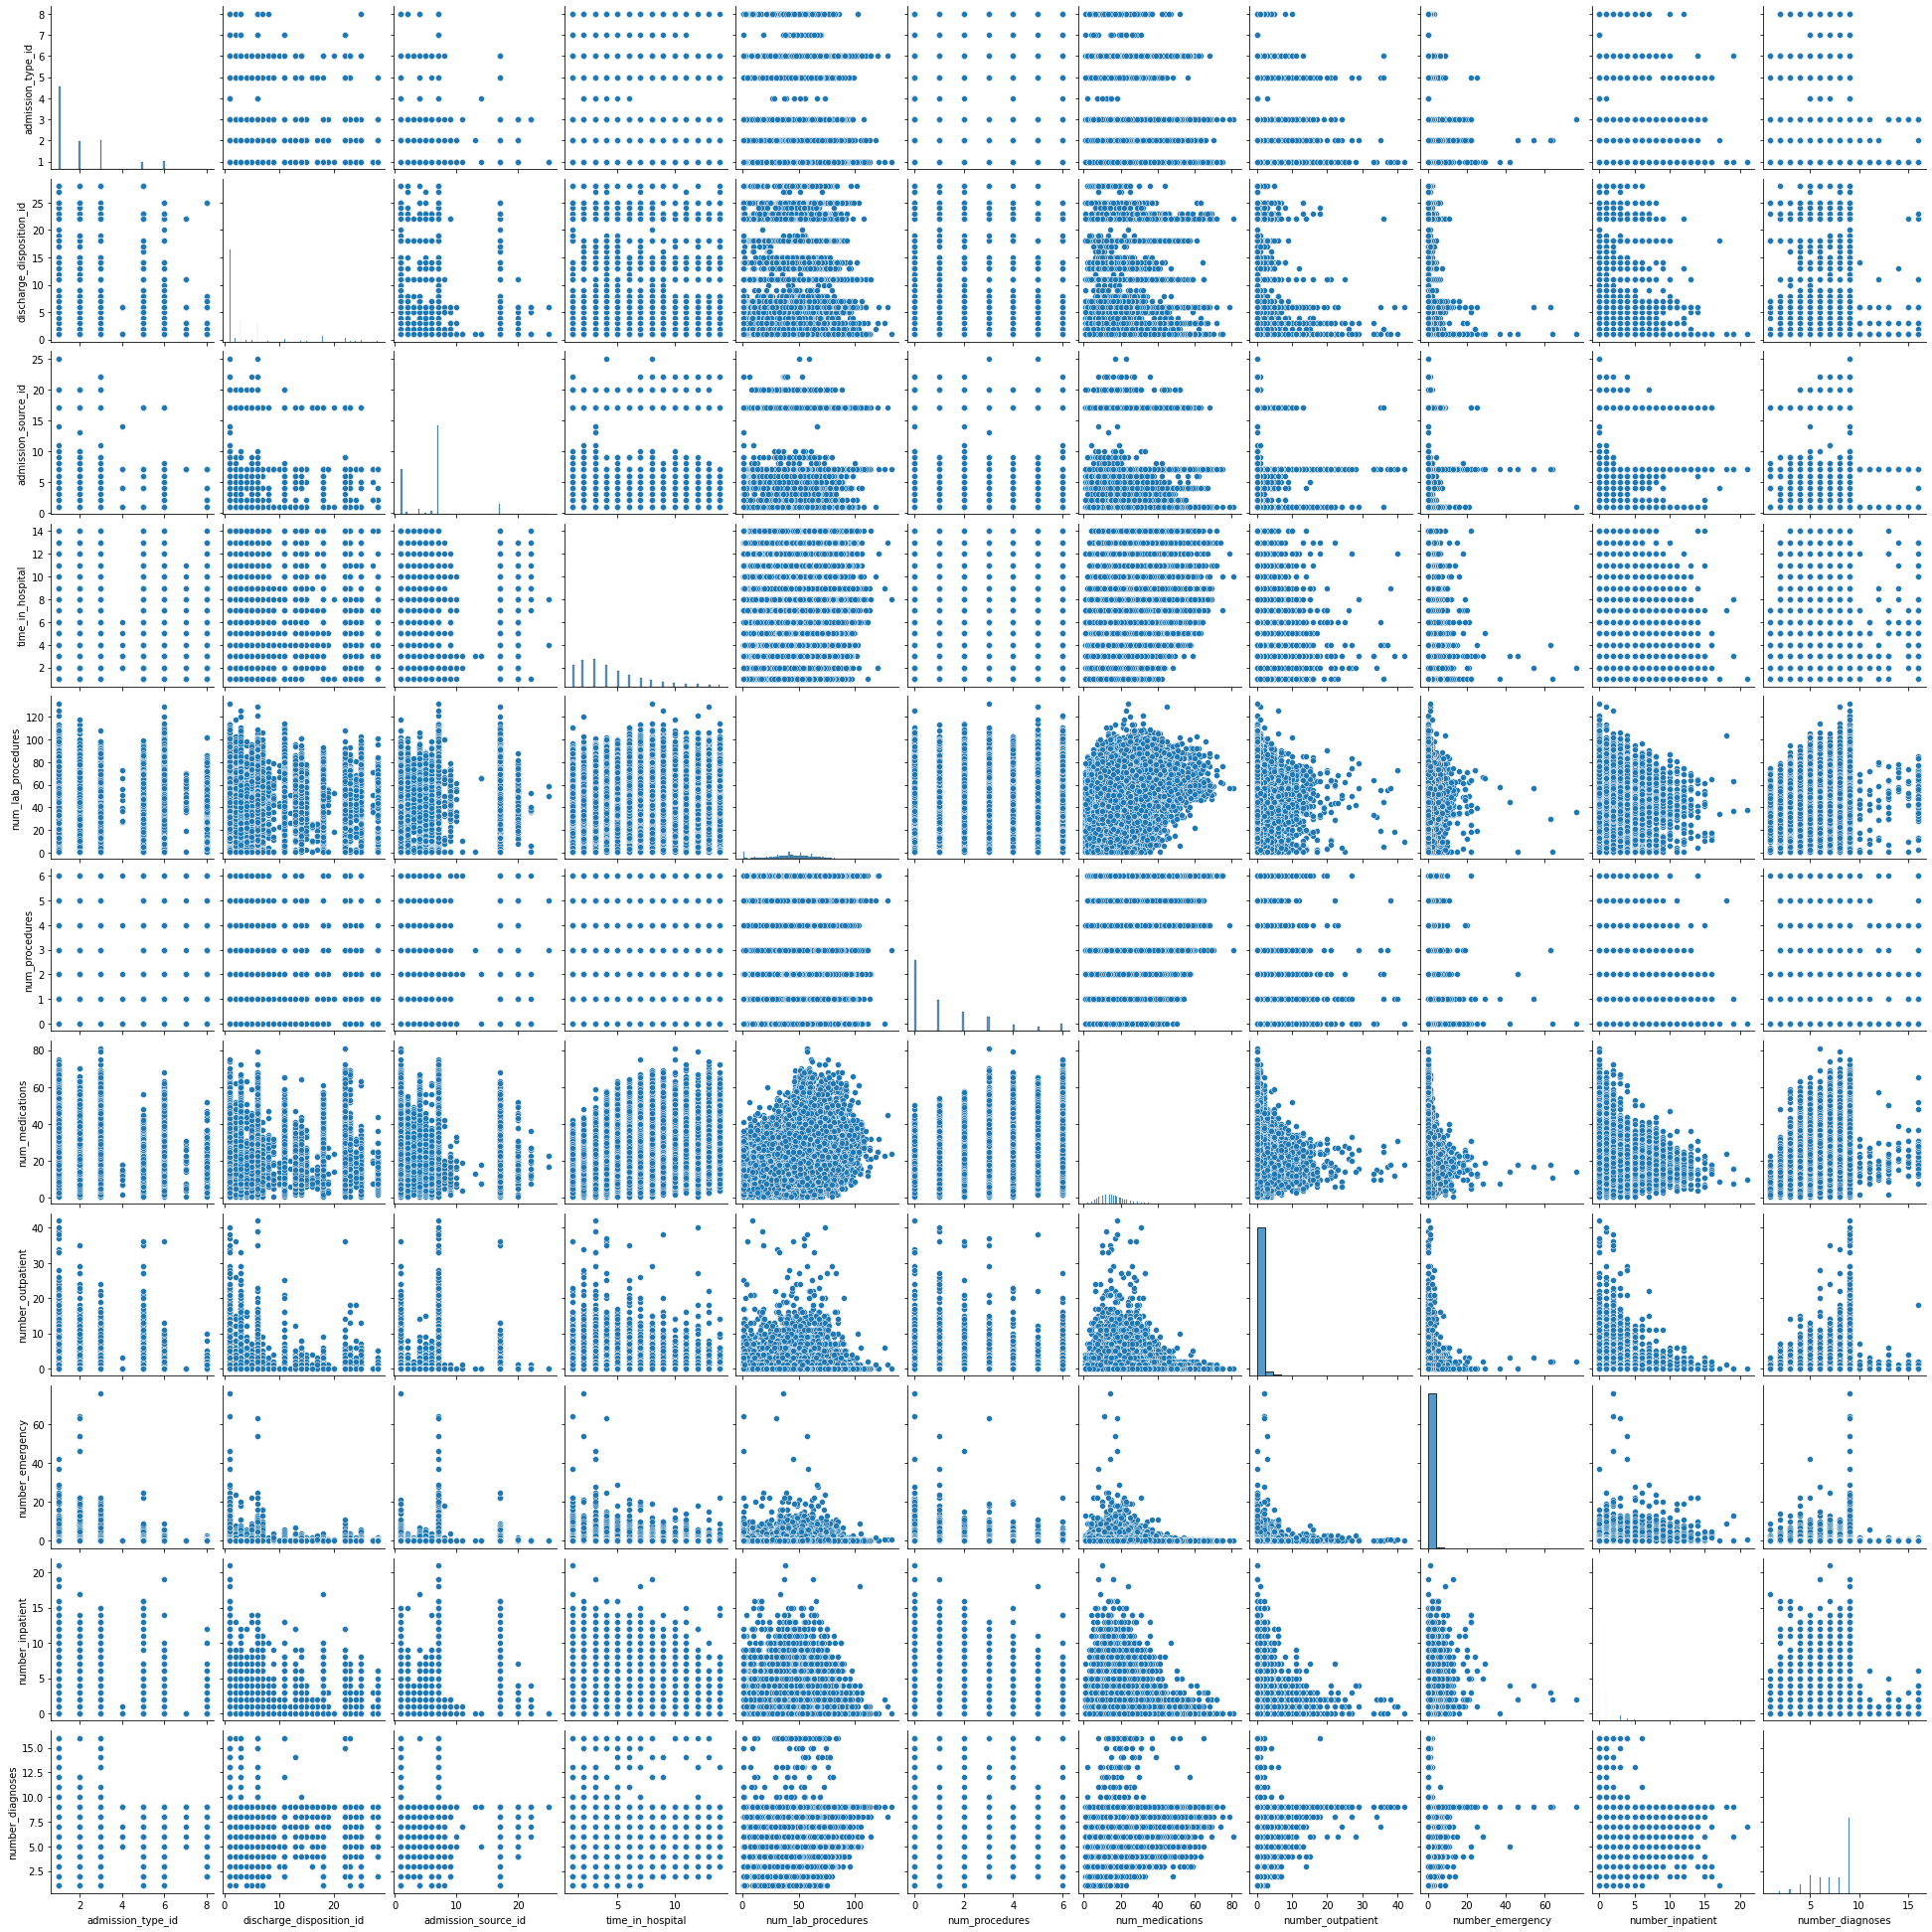

In [36]:
# VISUALIZATIONS
# appears to be:
# positive correlation between 'num_lab_prodecures' and 'num_medication' - will explore this further
# some negative correlation between 'number_outpatient' and 'number_emergency'
# some negative correlation between 'number_outpatient' and 'number_inpatient'
# some negative correlation between 'number_outpatient' and 'num_medications'

set = df[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',	
          'num_lab_procedures',	'num_procedures',	'num_medications', 'number_outpatient',	'number_emergency',	'number_inpatient',	
          'number_diagnoses', 'change', 'diabetesMed', 'readmitted']]

sns.pairplot(set)


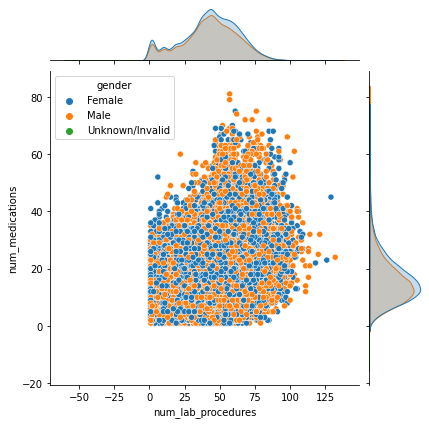

In [37]:
# FURTHER EXAMINE THE POSITIVE CORRELATION BETWEEN 'num_lab_procedures', and 'num_medications'

# breakdown by gender appears to be faily dispersed
# histogram for 'num_lab_procedures' appears to be fairly normally distributed
# histogram for 'num_medications' appear to have some left skewness

sns.jointplot(x='num_lab_procedures', y='num_medications', data=set, kind='scatter', hue ='gender')


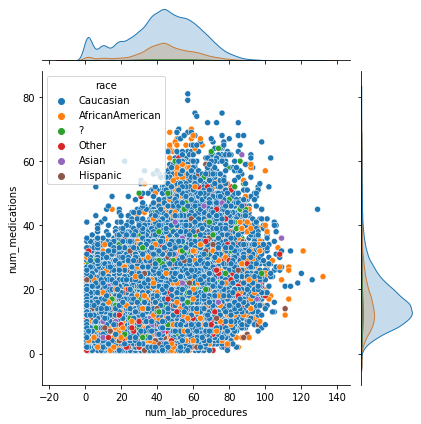

In [38]:
# breakdown by race - 
sns.jointplot(x='num_lab_procedures', y='num_medications', data=set, kind='scatter', hue ='race')

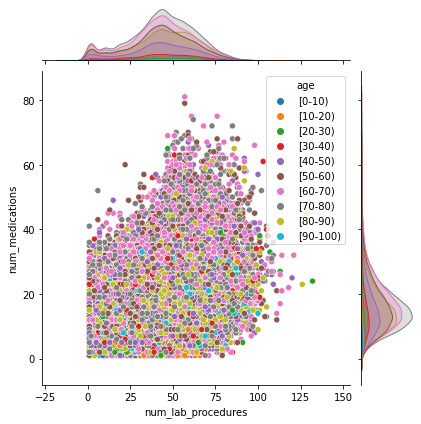

In [39]:
# breaksown by age - 50-60 and 60-70 age group appear to be given more medication for similar number of lab procedures
# compared to other age groups 
sns.jointplot(x='num_lab_procedures', y='num_medications', data=set, kind='scatter', hue ='age')